# About

SHiP track pattern recognition is in this notebook.

# Data

In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt
import cPickle as pickle

In [3]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index

# Get reconstructible events

In [138]:
from ReconstructibleTracks import get_reconstractible_tracks

reconstructible_events = {}

for event_id in range(0, 2500):
    
    tracks = get_reconstractible_tracks(event_id, all_hits, all_mctracks, all_velo_points)
    
    if tracks != []:
        reconstructible_events[event_id] = tracks

In [22]:
# file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'wb')
# pickle.dump(reconstructible_events, file_pickle)
# file_pickle.close()

In [4]:
file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'rb')
reconstructible_events_pkl = pickle.load(file_pickle)
file_pickle.close()

In [5]:
reconstructible_events = reconstructible_events_pkl

# Stations 1&2

In [23]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events12 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.85, 0, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 0)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events12[event_id] = reco
    
    print event_id

In [24]:
# file_pickle = open('./Data/reco_events12.pkl', 'wb')
# pickle.dump(reco_events12, file_pickle)
# file_pickle.close()

In [6]:
file_pickle = open('./Data/reco_events12.pkl', 'rb')
reco_events12_pkl = pickle.load(file_pickle)
file_pickle.close()

In [7]:
reco_events12 = reco_events12_pkl

# Stations 3&4

In [ ]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events34 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.85, 1, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 1)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events34[event_id] = reco
    
    print event_id

In [26]:
# file_pickle = open('./Data/reco_events34.pkl', 'wb')
# pickle.dump(reco_events34, file_pickle)
# file_pickle.close()

In [8]:
file_pickle = open('./Data/reco_events34.pkl', 'rb')
reco_events34_pkl = pickle.load(file_pickle)
file_pickle.close()

In [9]:
reco_events34 = reco_events34_pkl

# Combination tracks

In [9]:
from MatchTracks import get_matched_tracks, get_true_match

match_tracks, charge_dict, pinv_dict, dist_y, dist_x = get_matched_tracks(reco_events12, reco_events34)

true_charge_dict, true_pdg_dict, true_pinv_dict = get_true_match(reco_events12, reco_events34, match_tracks, all_hits)

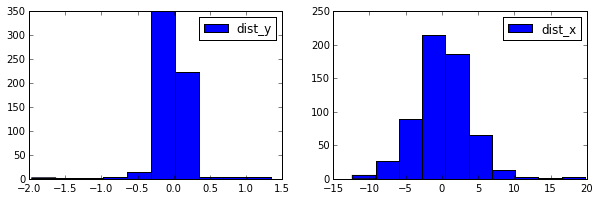

In [10]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
dist_y = numpy.array(dist_y)
plt.hist(dist_y, label='dist_y', bins=10)
plt.legend(loc='best')


plt.subplot(1,2,2)
dist_x = numpy.array(dist_x)
plt.hist(dist_x, label='dist_x', bins=10)
plt.legend(loc='best')

plt.show()

# Efficiency

### Stations 1&2

In [11]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events12)

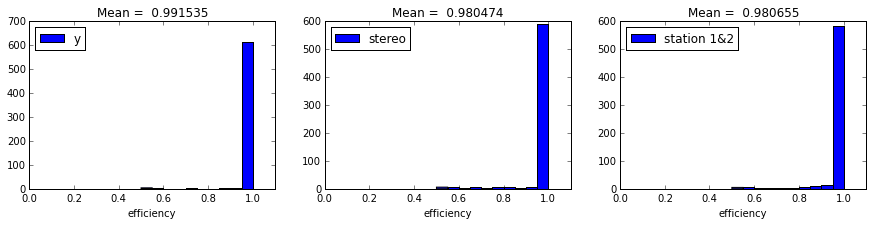

In [12]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Stations 3&4

In [13]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events34)

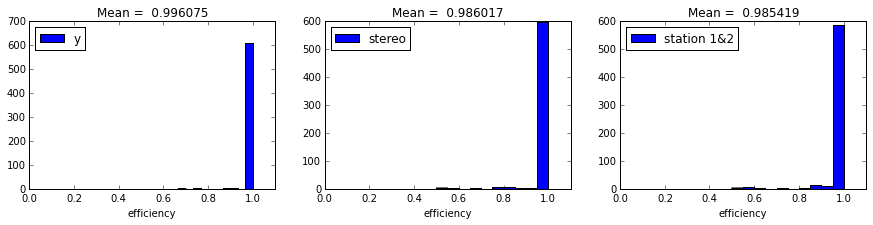

In [14]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Efficiency per event

Total efficiency per event is  90.8805031447  %


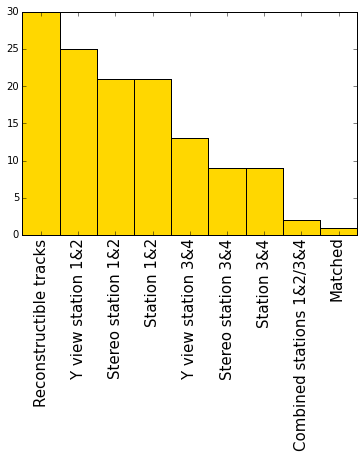

In [15]:
from efficiency import efficiency_per_event

n_events = efficiency_per_event(reconstructible_events, reco_events12, reco_events34, match_tracks, true_pdg_dict)

n_events = numpy.array(n_events)

labels = ['Reconstructible tracks', 
          'Y view station 1&2', 
          'Stereo station 1&2', 
          'Station 1&2',
          'Y view station 3&4', 
          'Stereo station 3&4',
          'Station 3&4',
          'Combined stations 1&2/3&4',
          'Matched']

print 'Total efficiency per event is ', 1. * n_events[-1] / n_events[0] * 100., ' %'

x = range(len(labels))
#plt.figure(figsize=(15,5))
plt.bar(x, n_events - n_events.min() + 1., width=1., color='gold', align='center')
plt.xticks(x, labels, rotation=90, size=15)
plt.xlim(-0.5, 8.5)
plt.show()

In [16]:
n_events

array([ 318.,  313.,  309.,  309.,  301.,  297.,  297.,  290.,  289.])

In [17]:
290. / 318

0.9119496855345912

In [21]:
numpy.sqrt(0.91*0.09/290)

0.016805171617792193

# Momentum

y = b + kx
k, b =  1.03666252179 -0.000366888944499
Cov matrix is 
[[  3.12985167e-06  -5.34458133e-09]
 [ -5.34458133e-09   3.90992426e-08]]


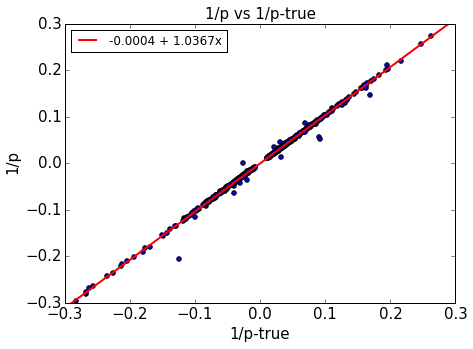

In [18]:
from MatchTracks import get_pinv_true_pinv
        
pinv, true_pinv = get_pinv_true_pinv(pinv_dict, true_pinv_dict, true_charge_dict)
        

[k, b], cov = numpy.polyfit(true_pinv, pinv, 1, cov=True)
print 'y = b + kx'
print 'k, b = ', k, b
print 'Cov matrix is '
print cov

plt.figure(figsize=(7, 5))
plt.title('1/p vs 1/p-true', size=15)
plt.scatter(true_pinv, pinv)
x = numpy.array([-0.3, 0.3])
plt.plot(x, k * x + b, color='r', linewidth=2, label='%.4f + ' % b + '%.4fx' % k)
plt.legend(loc='best')
plt.ylabel('1/p', size=15)
plt.xlabel('1/p-true', size=15)
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

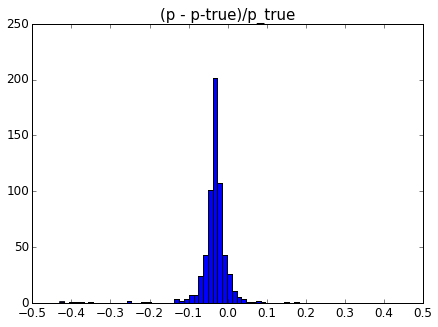

In [19]:
metric = true_pinv/pinv - 1

plt.figure(figsize=(7, 5))
plt.hist(metric[numpy.abs(metric) <= 0.5], bins=50)

plt.title('(p - p-true)/p_true', size=15)
plt.xticks(numpy.arange(-0.5, 0.51, 0.1), size=12)
plt.yticks(size=12)
plt.xlim(-0.5, 0.5)
plt.show()